### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 270_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,0.033578,0.217185,0.699406,1.350989,1.757034,8.643099,1.549146,1.069845,1.012316,1.044937,...,1.803662,1.736694,2.045148,1.928805,0.859002,1.522412,2.061311,1.981388,1.976275,47.070301
std,0.027246,0.024655,0.033300,0.018388,0.075307,3.419418,0.263680,0.009866,0.003160,0.026087,...,0.061433,0.075513,0.023037,0.039642,0.099755,0.056605,0.006942,0.004033,0.022279,19.816210
min,0.008789,0.141732,0.654207,1.312063,1.639698,1.661791,0.801298,0.990062,0.976118,0.999646,...,0.093863,1.492229,1.347045,0.483854,0.080453,0.081118,1.831244,1.956050,1.383089,24.400000
25%,0.023549,0.209118,0.677318,1.337456,1.698688,6.738608,1.407382,1.063729,1.009229,1.011092,...,1.797958,1.723986,2.045187,1.916520,0.833616,1.513195,2.057467,1.978736,1.969184,34.800000
50%,0.026542,0.222161,0.684664,1.341698,1.715060,7.968167,1.457797,1.070534,1.013228,1.060029,...,1.812296,1.759070,2.052191,1.932156,0.862715,1.527571,2.060411,1.981429,1.981489,39.300000
75%,0.031408,0.226819,0.722025,1.372241,1.846579,9.082370,1.535309,1.075080,1.014391,1.065755,...,1.825997,1.787164,2.055969,1.946583,0.888070,1.539269,2.062899,1.984086,1.989459,45.300000
max,0.161060,0.282803,0.788201,1.411738,1.976983,27.173952,4.275021,1.168489,1.025911,1.096462,...,1.894425,1.838858,2.066240,2.066410,1.223589,1.646429,2.075100,1.993904,2.032954,97.700000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

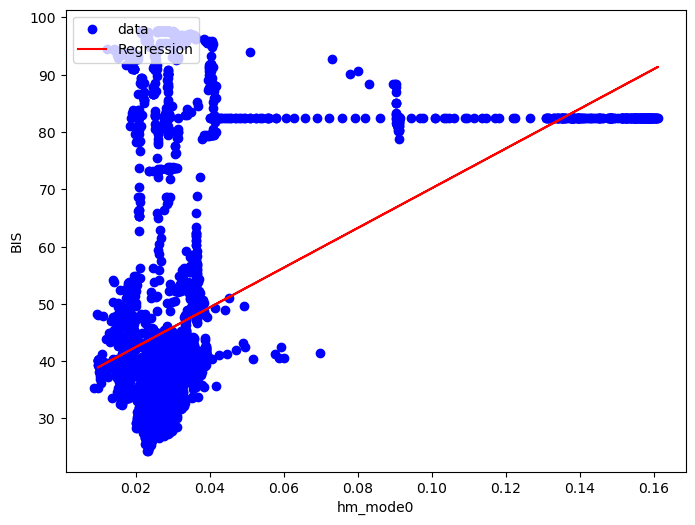

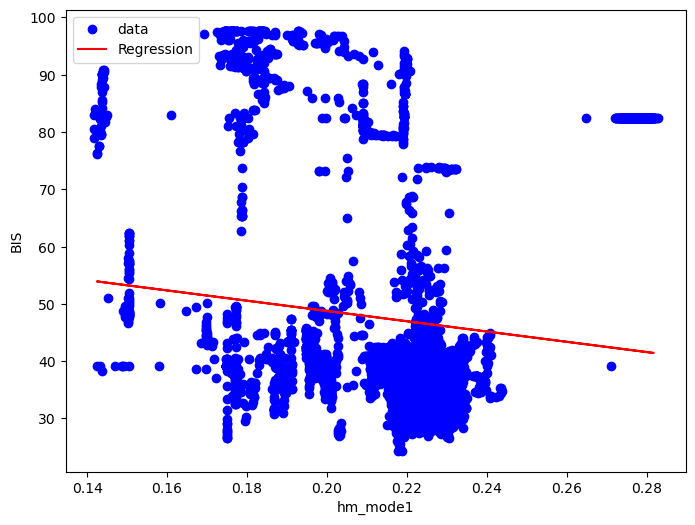

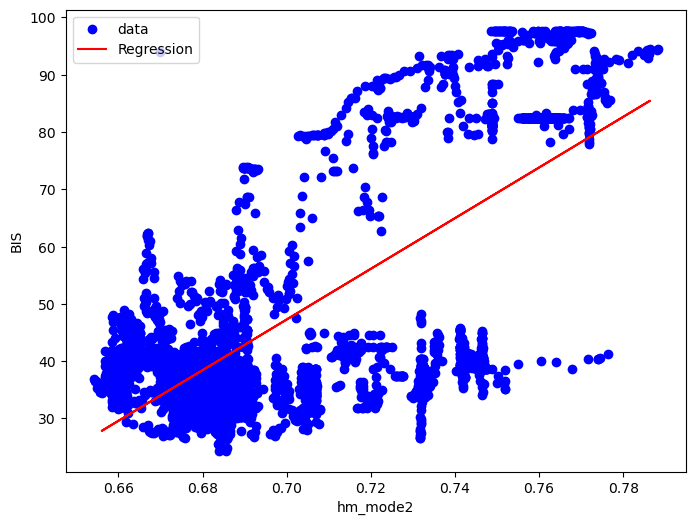

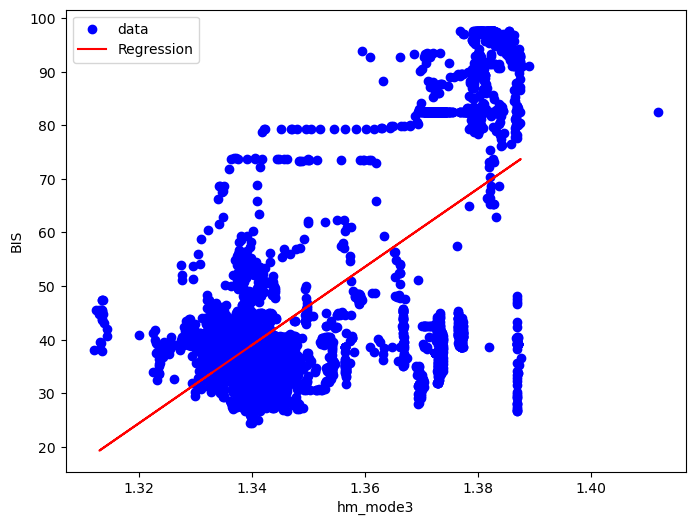

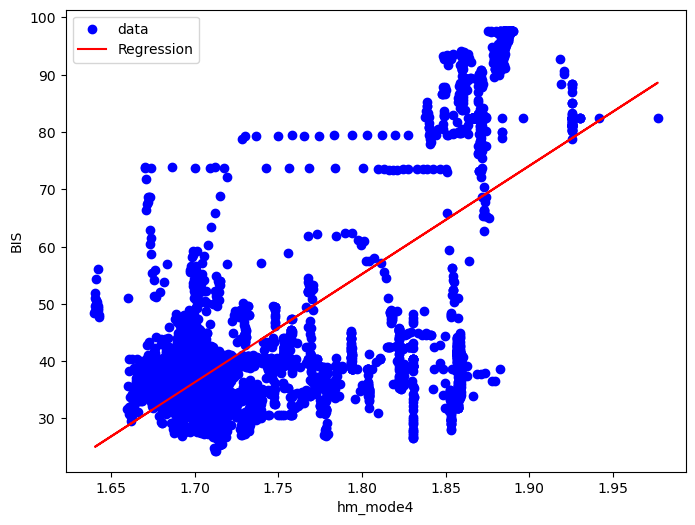

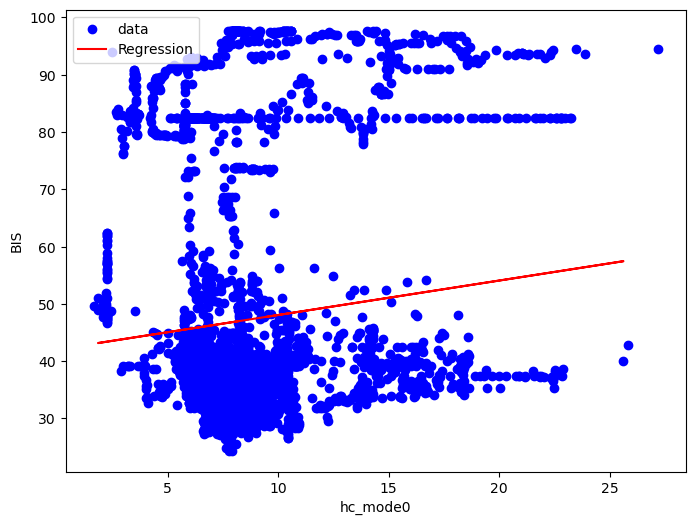

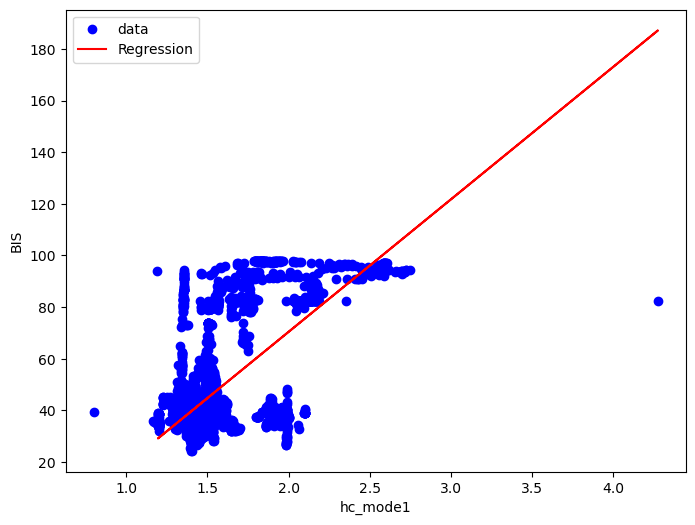

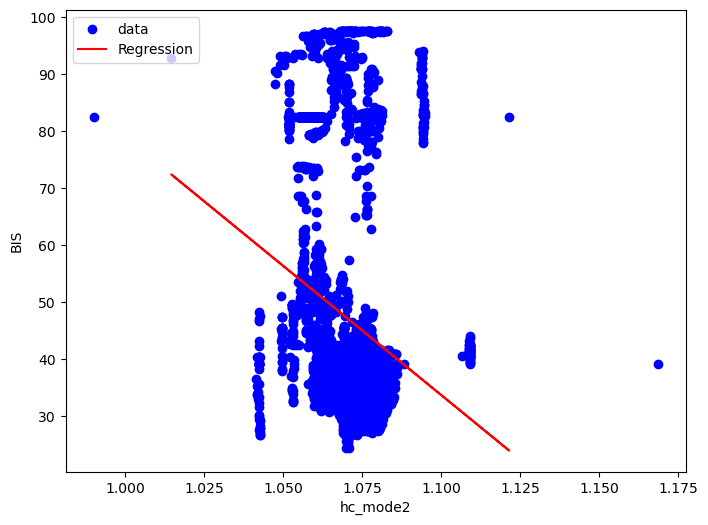

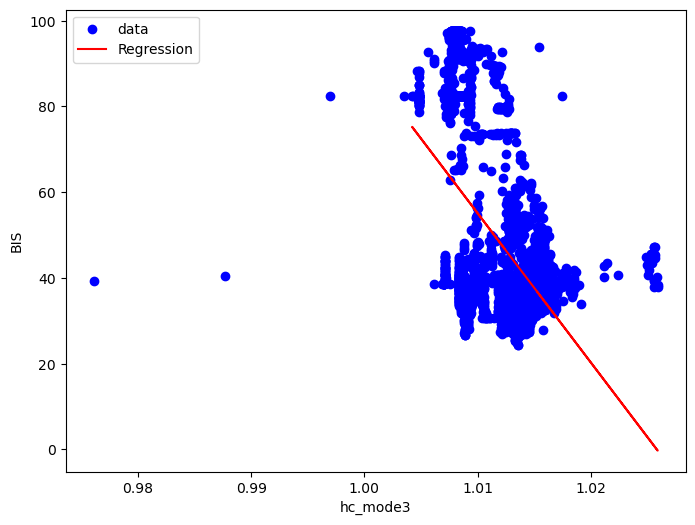

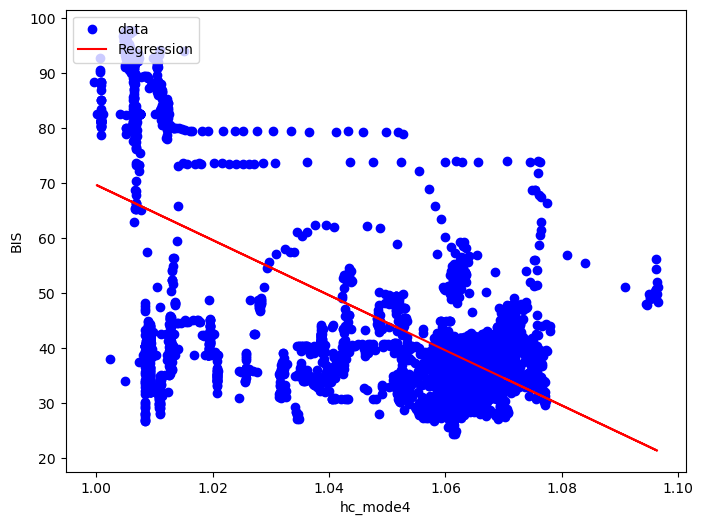

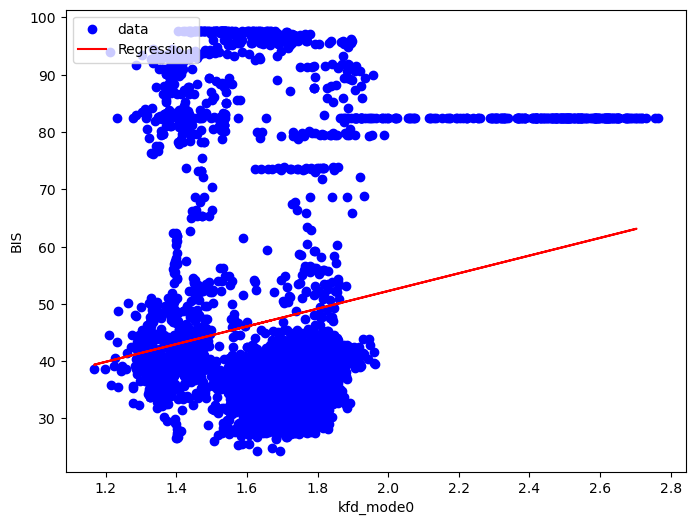

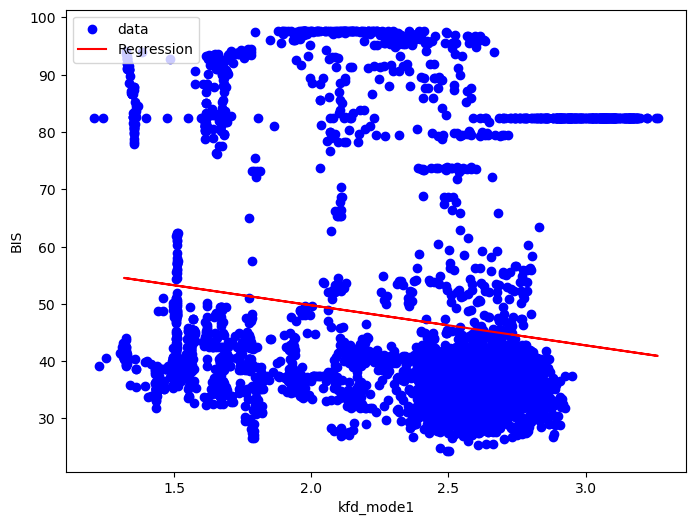

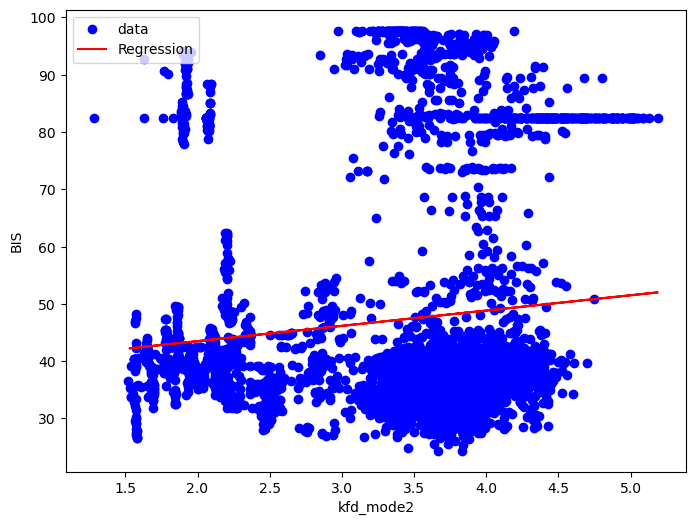

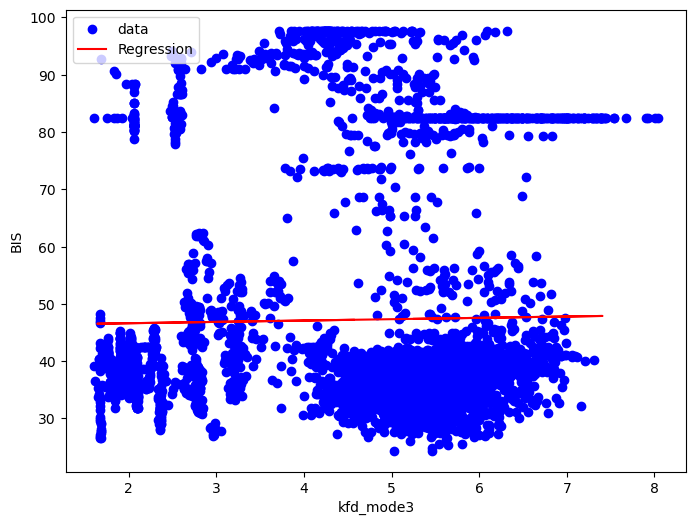

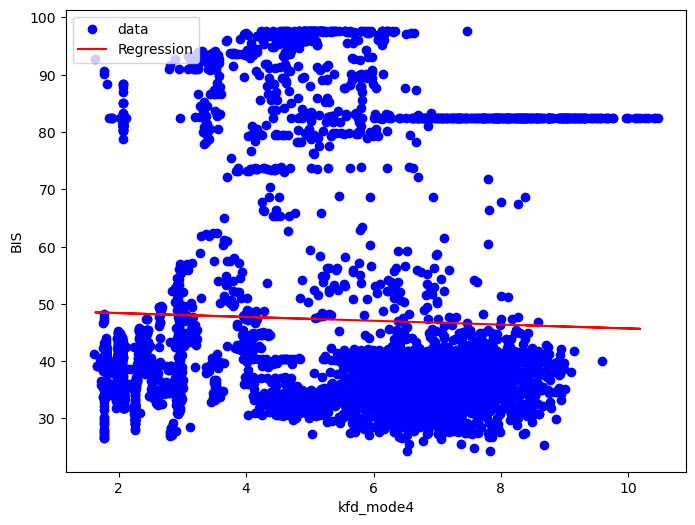

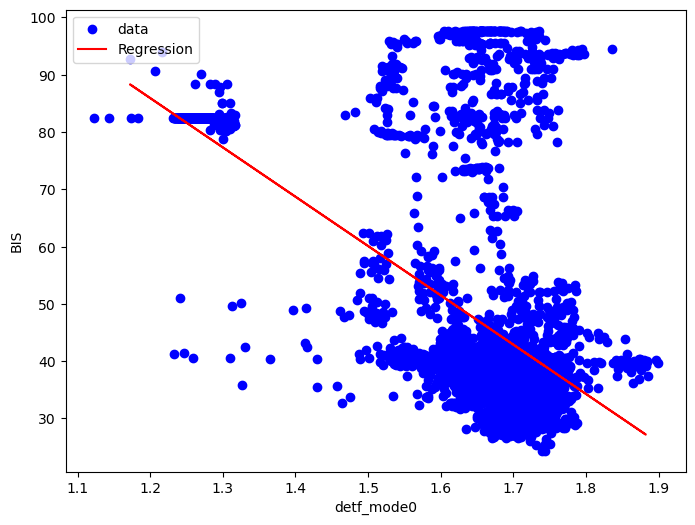

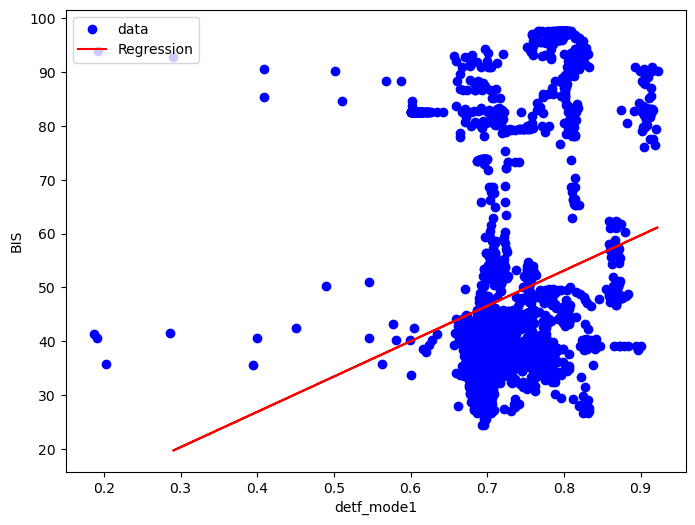

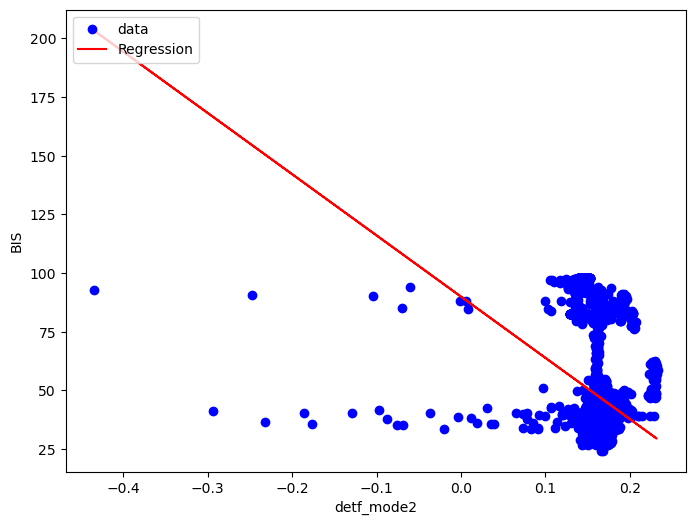

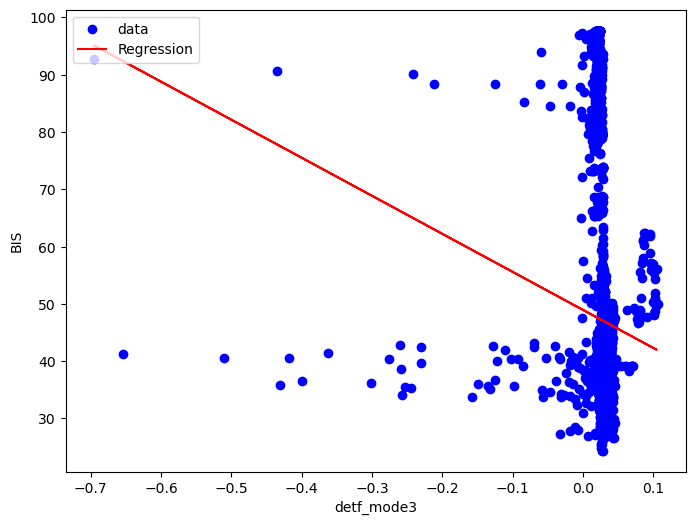

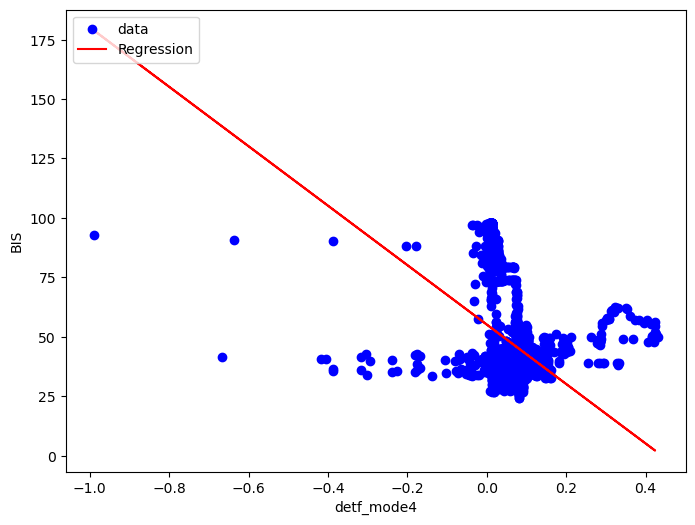

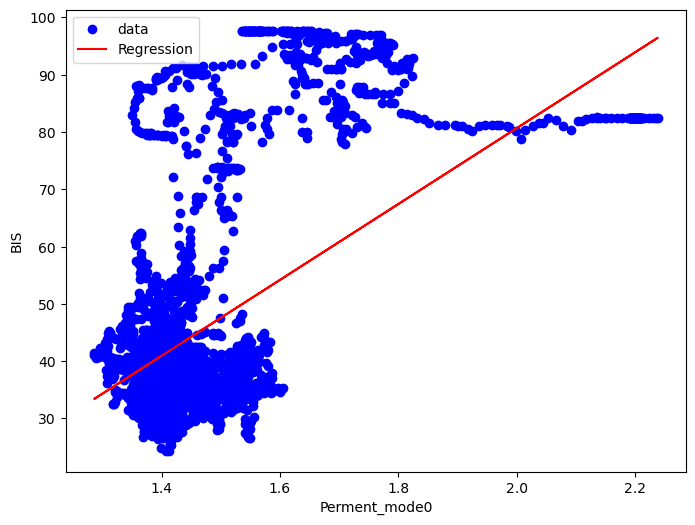

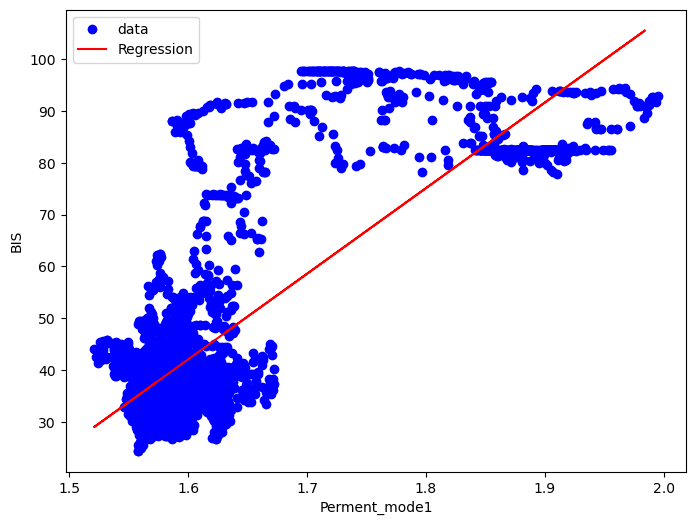

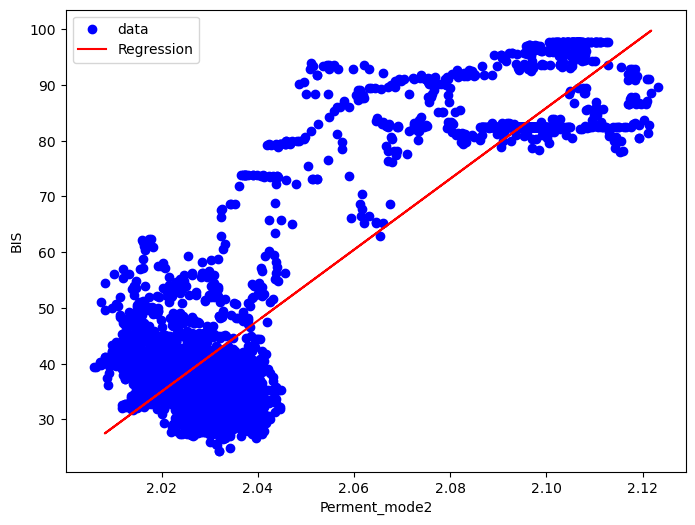

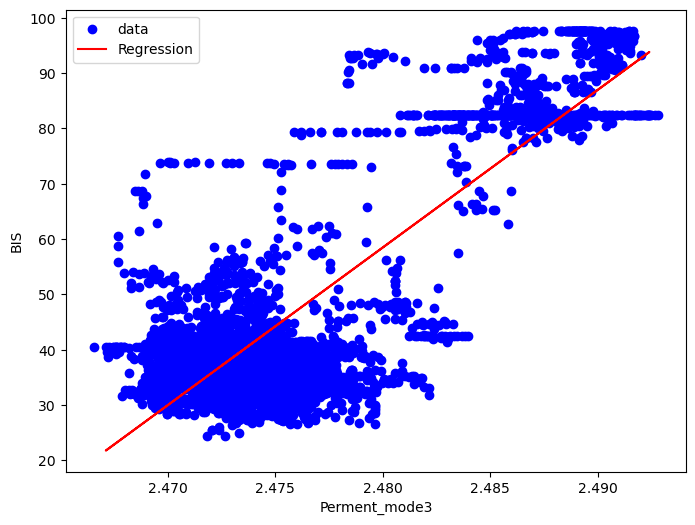

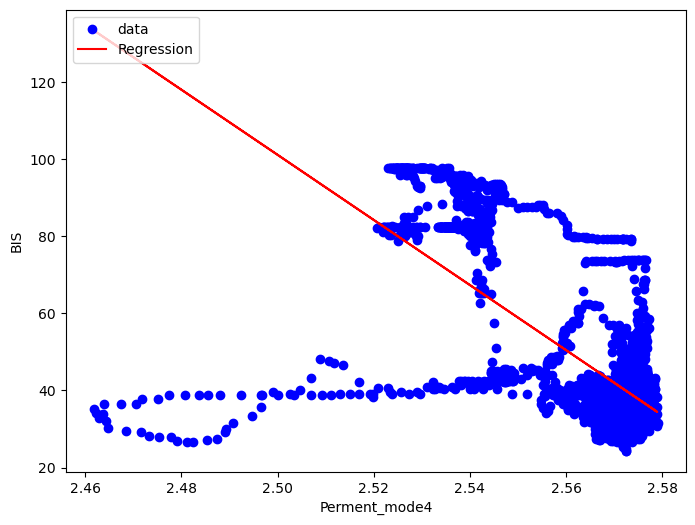

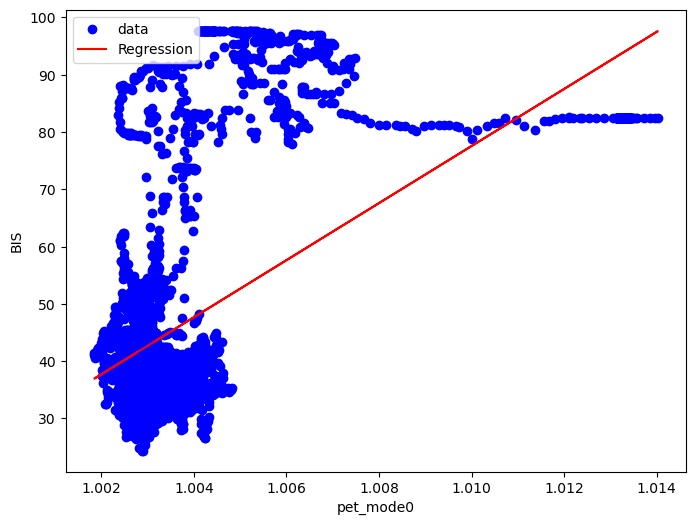

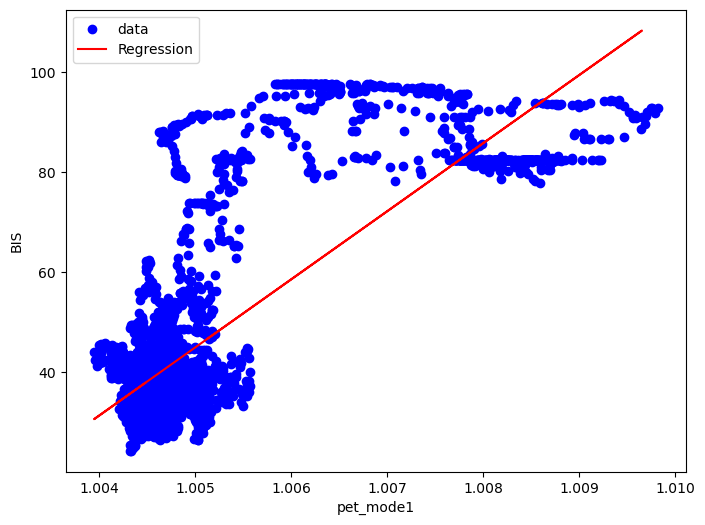

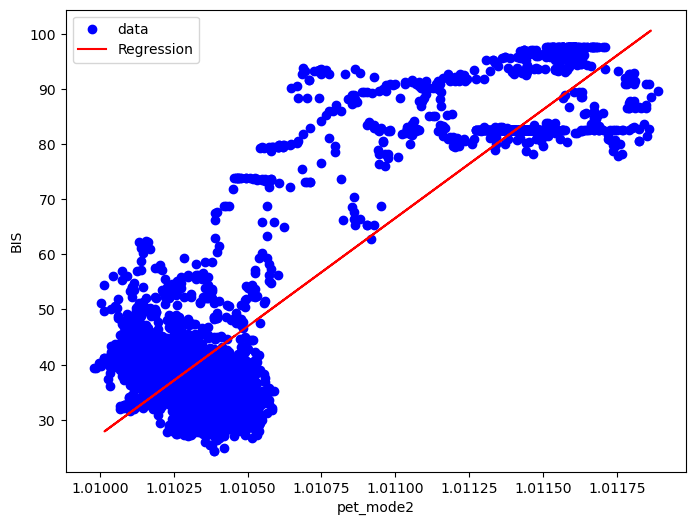

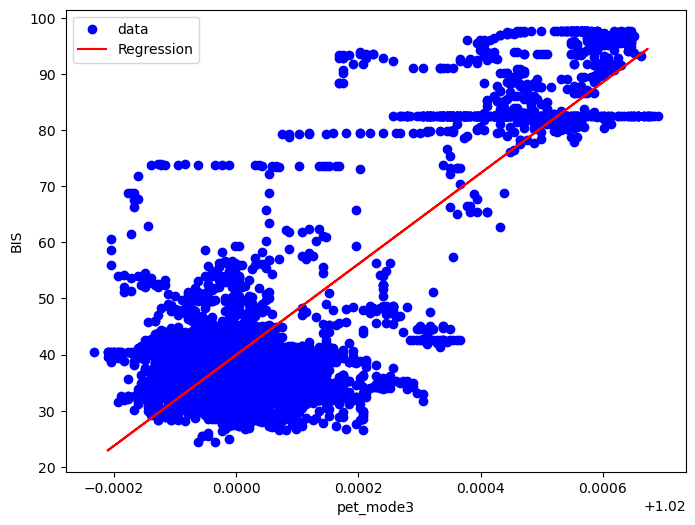

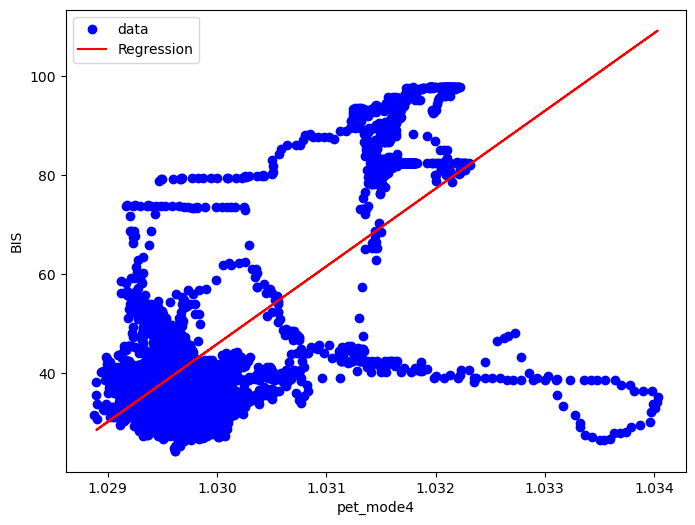

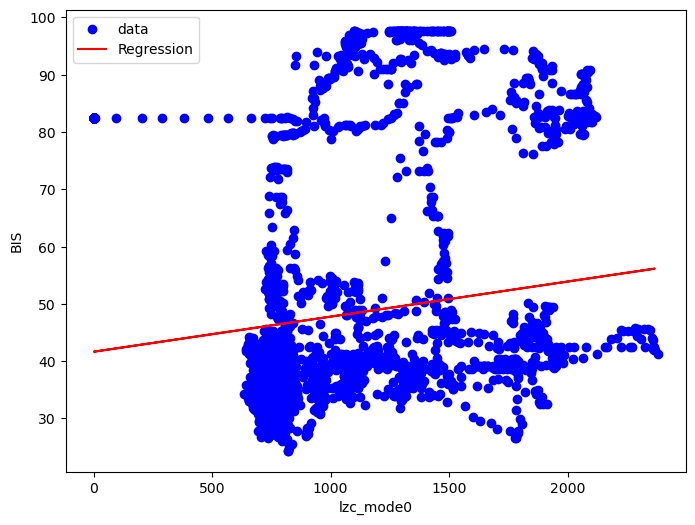

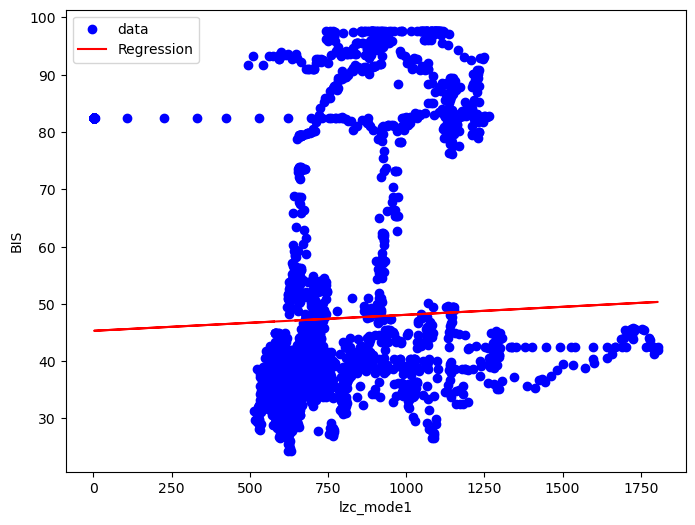

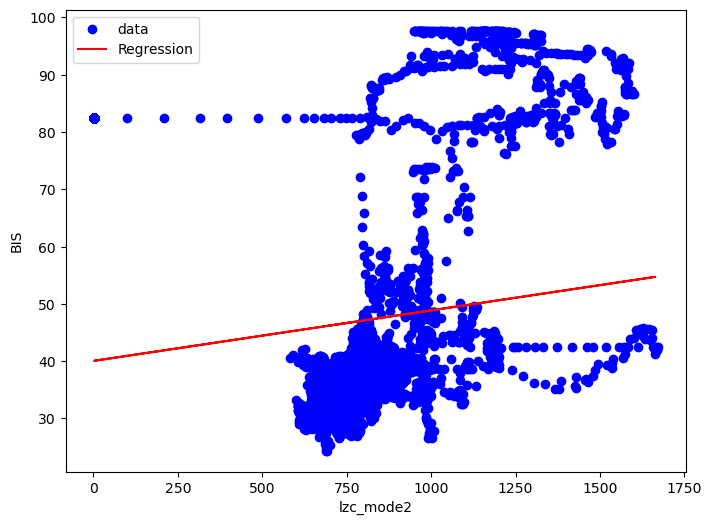

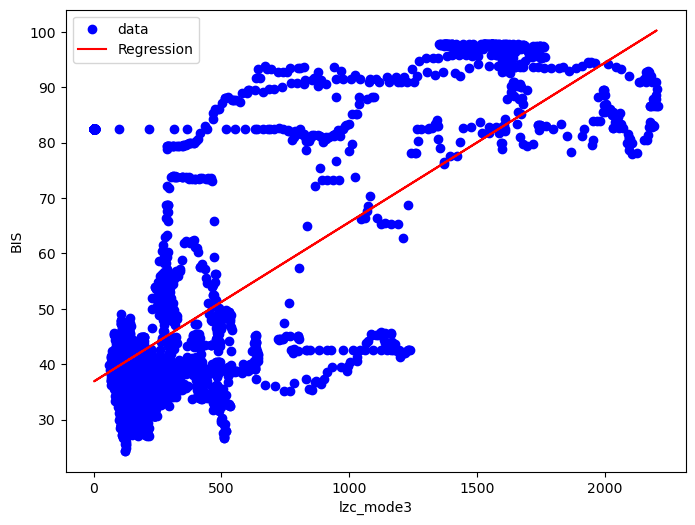

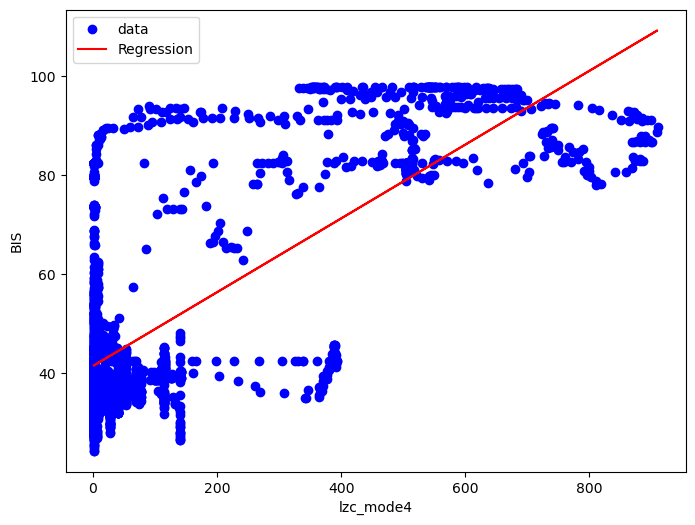

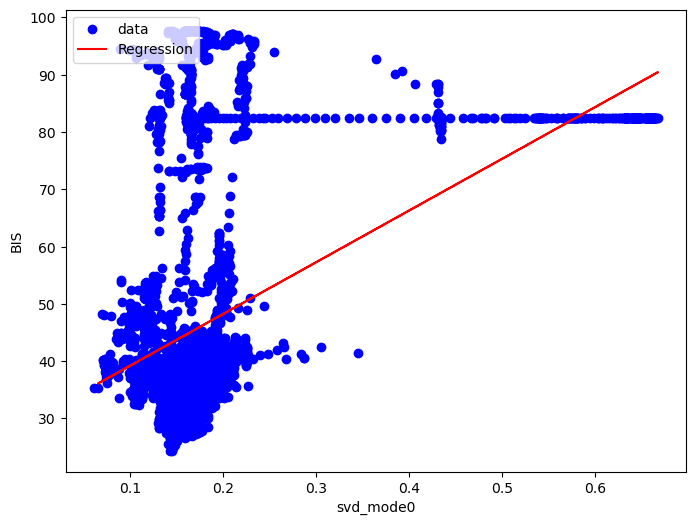

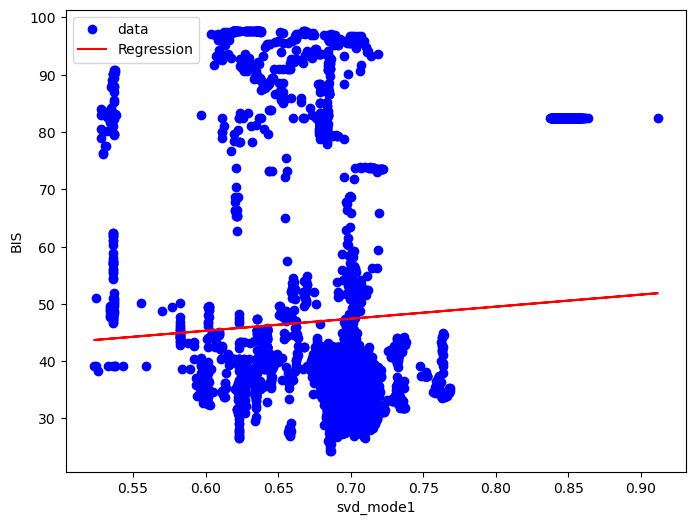

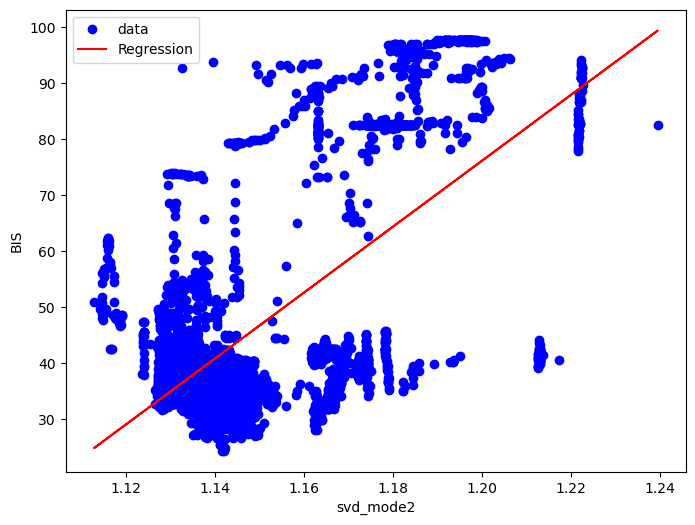

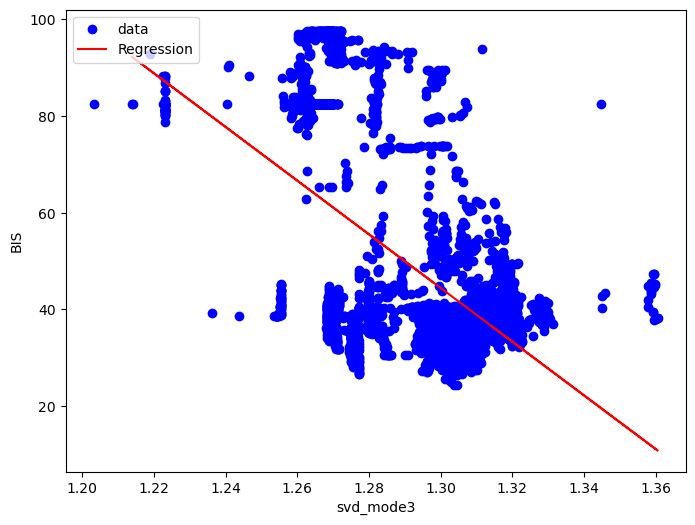

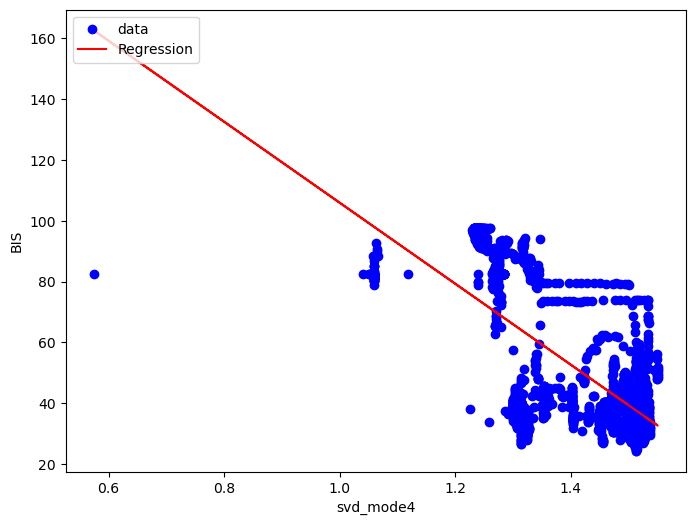

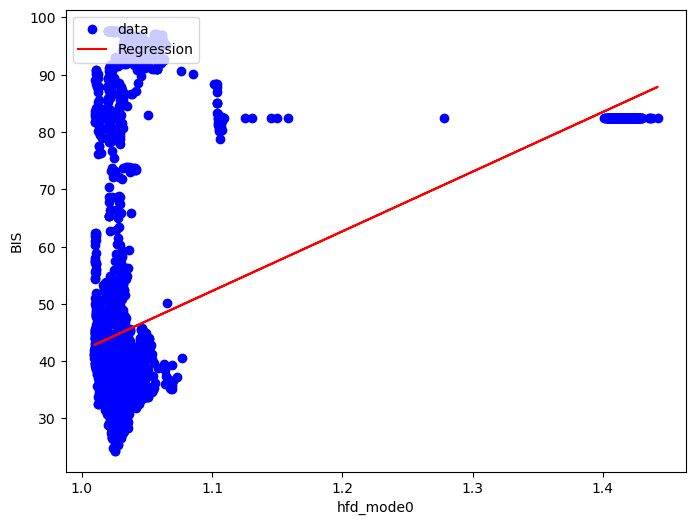

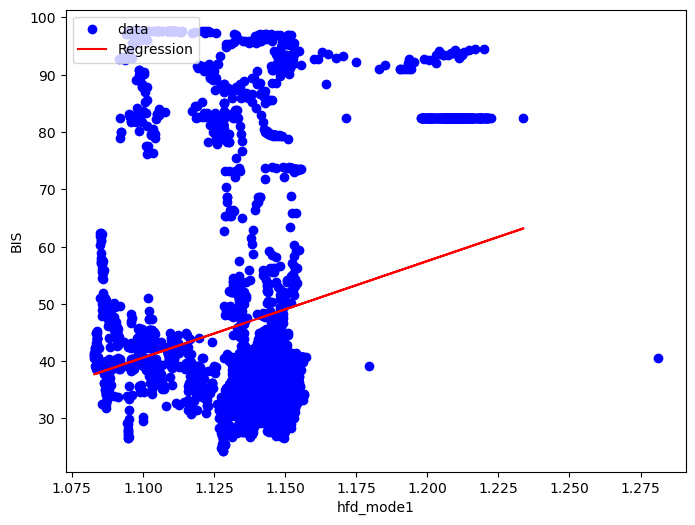

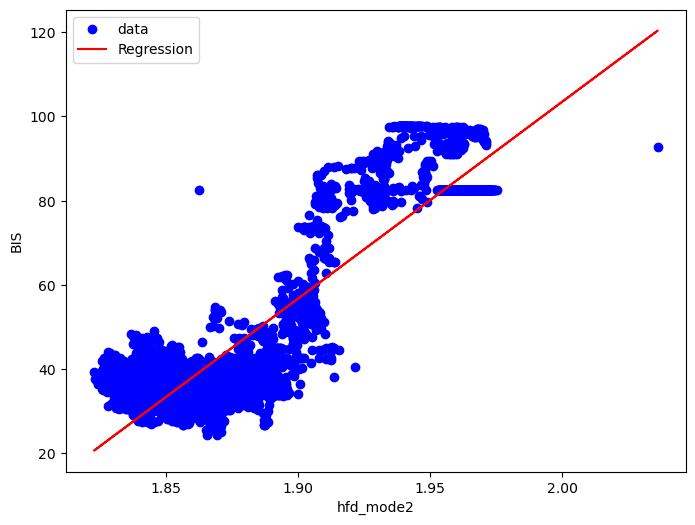

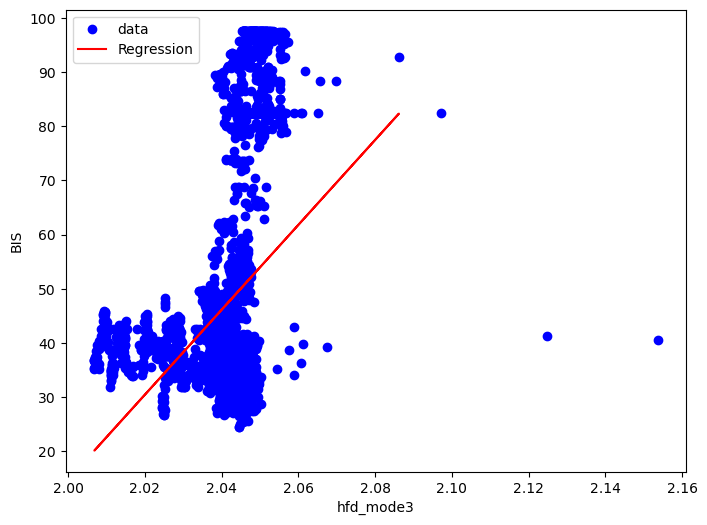

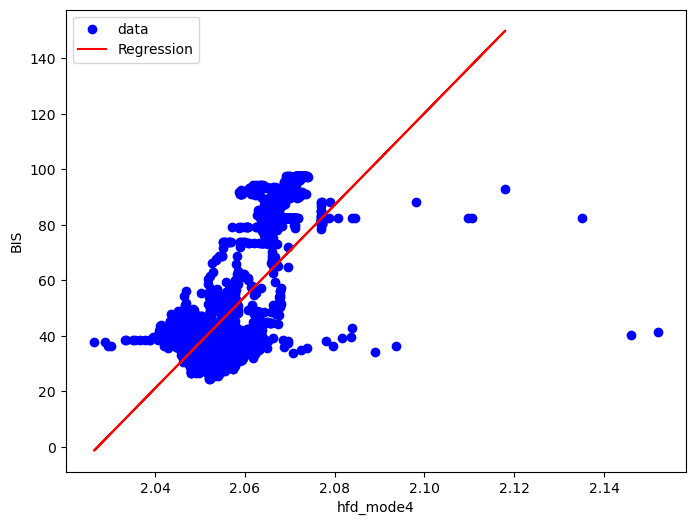

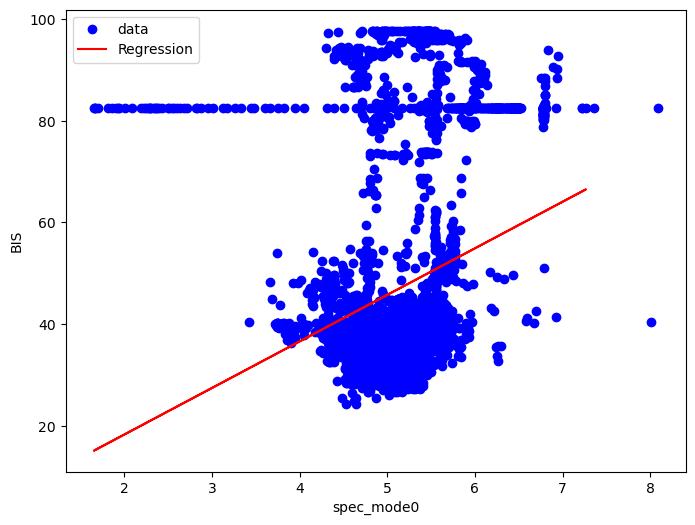

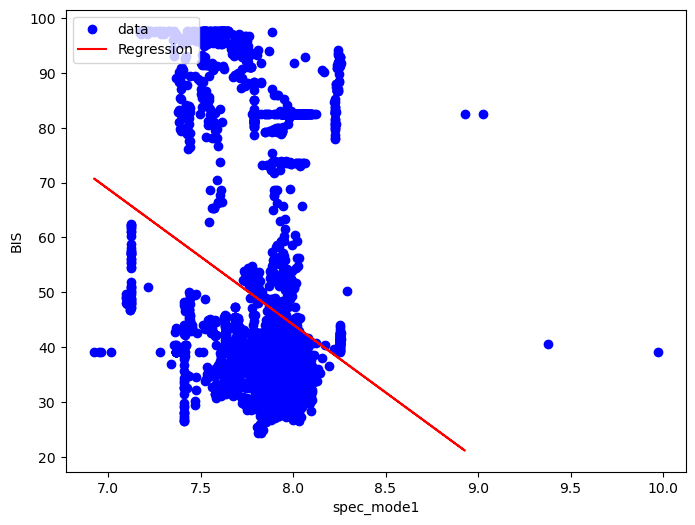

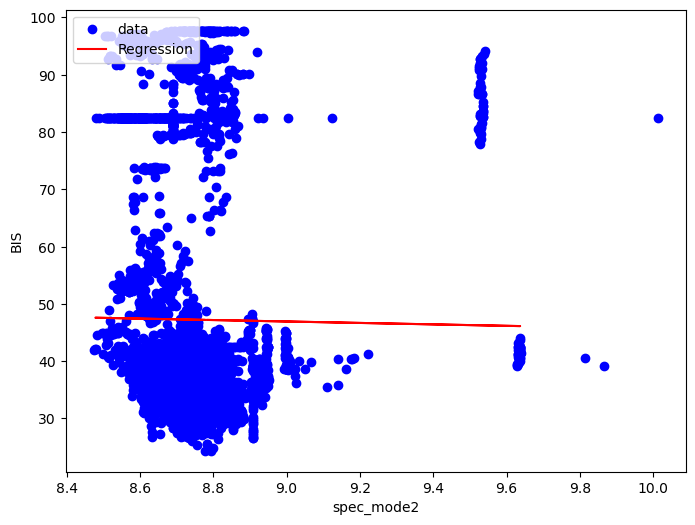

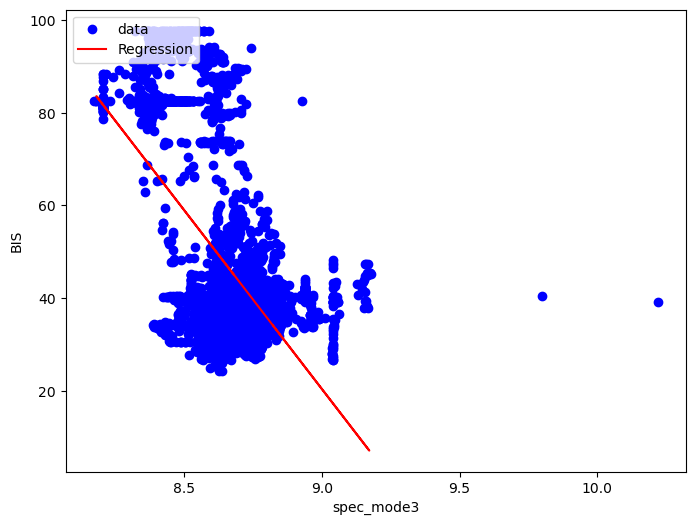

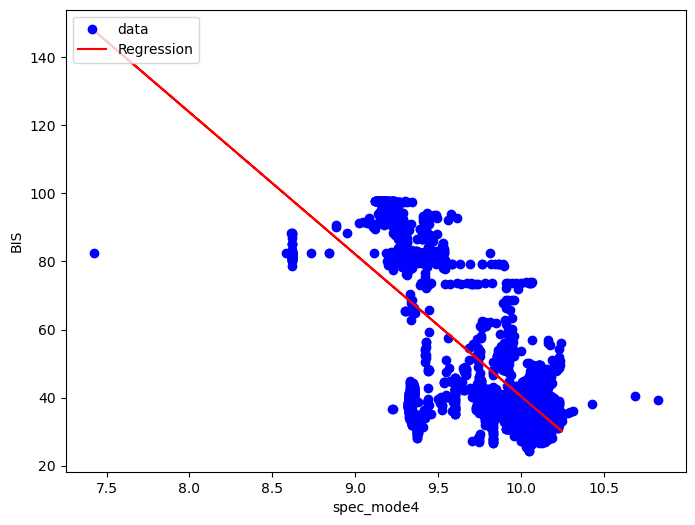

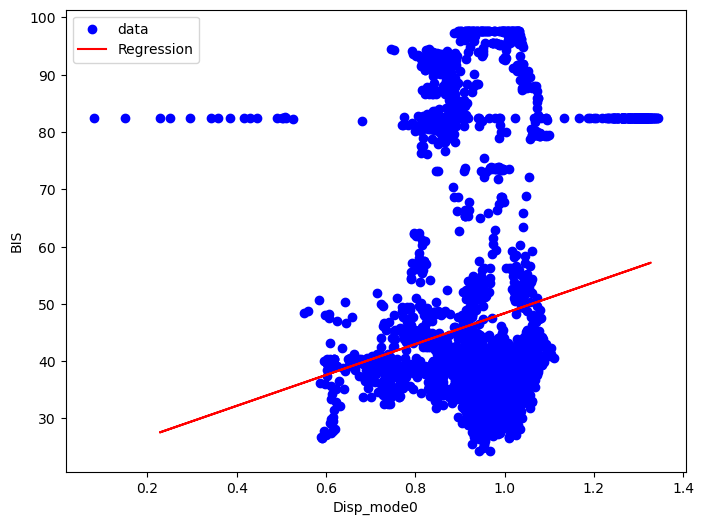

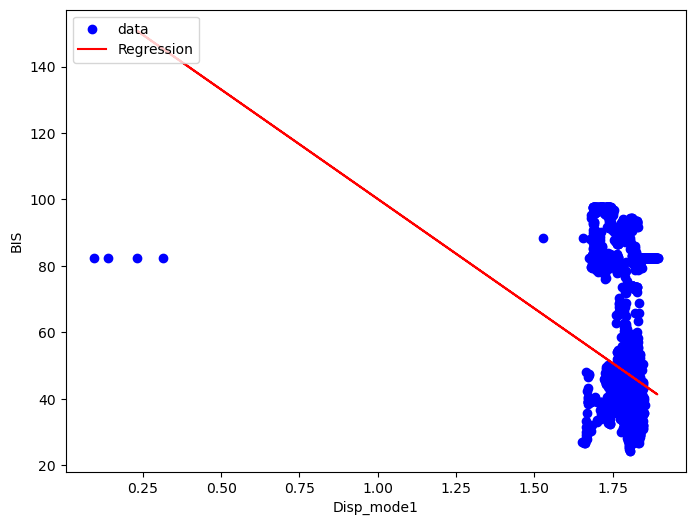

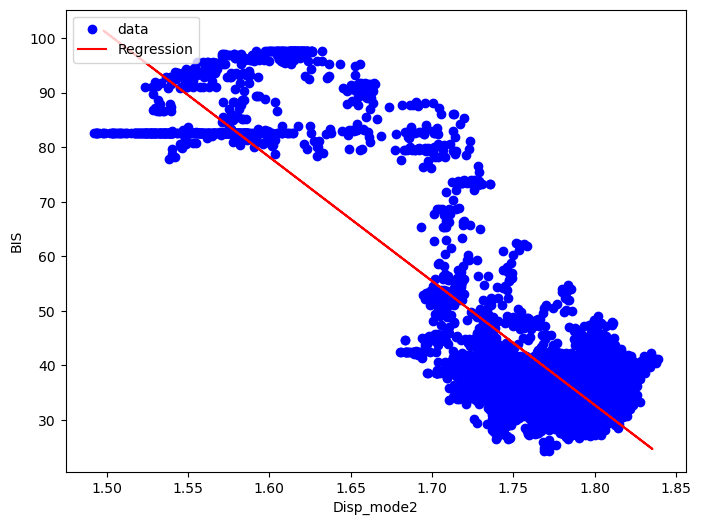

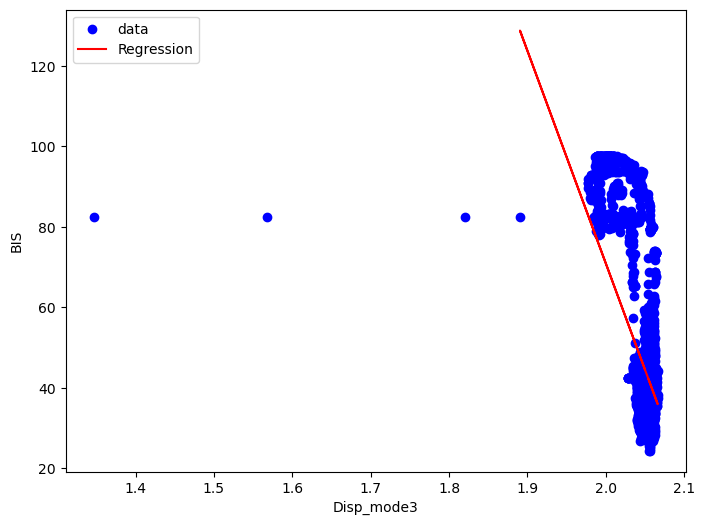

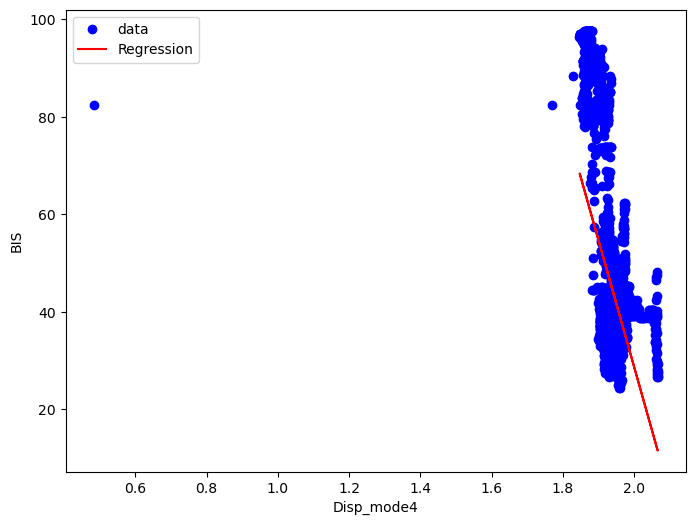

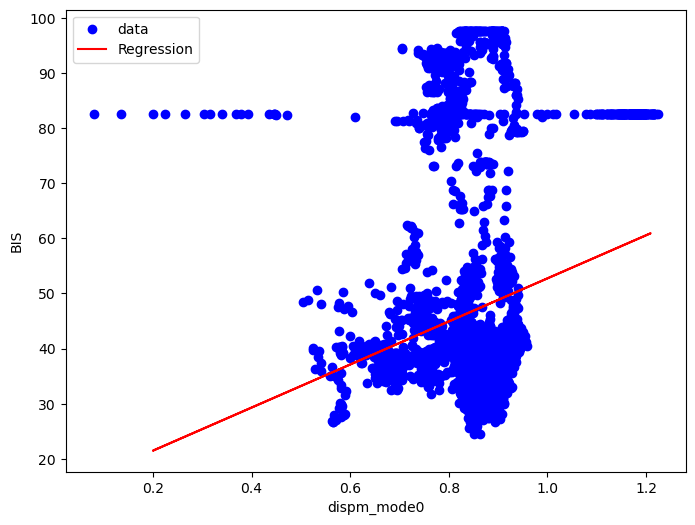

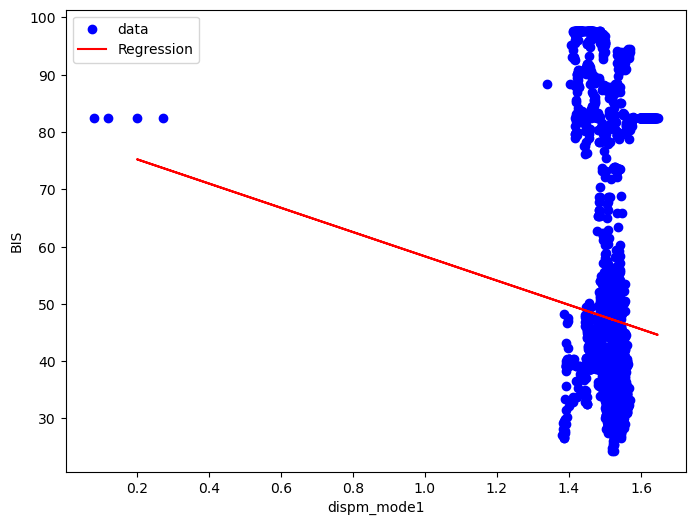

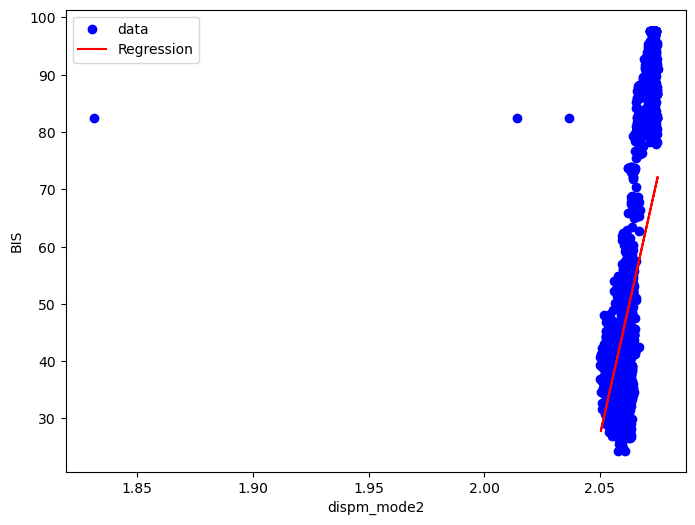

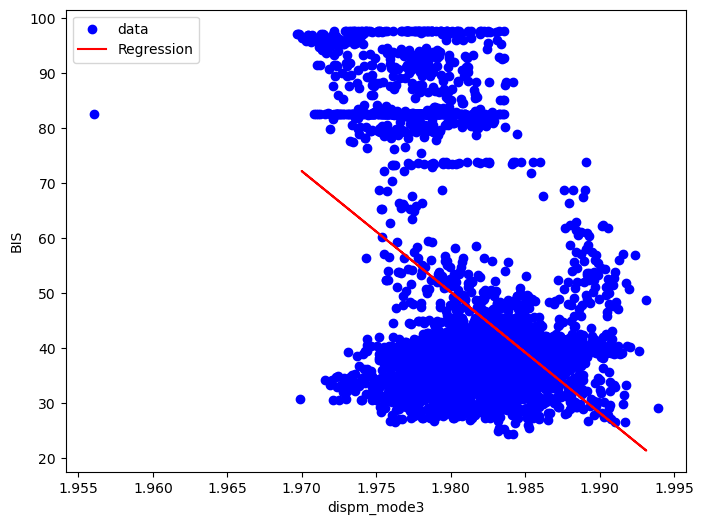

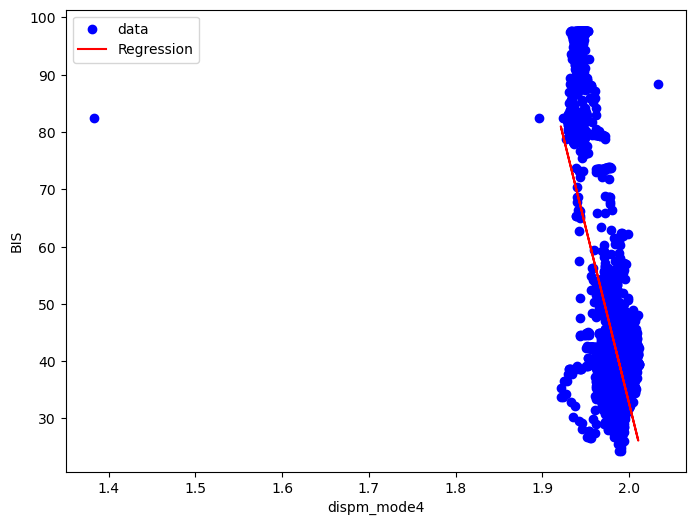

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
42,hfd_mode2_r2,74.875987
52,Disp_mode2_r2,73.678244
27,pet_mode2_r2,73.546113
22,Perment_mode2_r2,73.320526
28,pet_mode3_r2,69.493098
23,Perment_mode3_r2,68.777275
21,Perment_mode1_r2,63.471171
26,pet_mode1_r2,62.206336
57,dispm_mode2_r2,60.697835
59,dispm_mode4_r2,58.591906


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
22  Perment_mode2    0.770407
27      pet_mode2    0.088672
42      hfd_mode2    0.063222
32      lzc_mode2    0.010328
39      svd_mode4    0.007900
53     Disp_mode3    0.003934
52     Disp_mode2    0.003530
33      lzc_mode3    0.002756
6        hc_mode1    0.002477
19     detf_mode4    0.002118
49     spec_mode4    0.001882
5        hc_mode0    0.001829
37      svd_mode2    0.001724
11      kfd_mode1    0.001650
4        hm_mode4    0.001647
16     detf_mode1    0.001602
38      svd_mode3    0.001600
31      lzc_mode1    0.001419
30      lzc_mode0    0.001378
10      kfd_mode0    0.001372
9        hc_mode4    0.001336
24  Perment_mode4    0.001290
2        hm_mode2    0.001244
12      kfd_mode2    0.001233
55    dispm_mode0    0.001199
54     Disp_mode4    0.001128
36      svd_mode1    0.001113
51     Disp_mode1    0.001096
43      hfd_mode3    0.001023
50     Disp_mode0    0.000887
46     spec_mode1    0.000882
56    dispm_mode1    0.000872
34      lz